# **Fuel Efficiency Prediction**

# New Section

# New Section

In [ ]:
#importing the necessary modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the dataset

data=pd.read_csv('/content/mpg_raw.csv')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,1510.000000,1510.000000,1510.000000,1490.000000,1510.000000,1510.000000,1510.000000
mean,23.061523,5.515232,196.999338,105.732886,2997.238411,15.513046,75.733113
std,7.634573,1.713616,105.254049,38.851370,854.499865,2.756109,3.586611
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2228.500000,13.700000,73.000000
50%,22.000000,4.000000,151.000000,95.000000,2855.000000,15.500000,76.000000
75%,28.000000,8.000000,302.000000,130.000000,3645.000000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
data.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower      20
weight           0
acceleration     0
model_year       0
origin           0
name             0
dtype: int64

<Axes: xlabel='horsepower'>

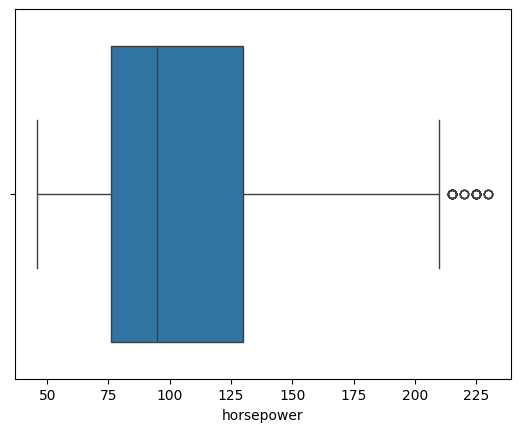

In [ ]:
sns.boxplot(x=data['horsepower'])

In [ ]:
median = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(median)

In [ ]:
data.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

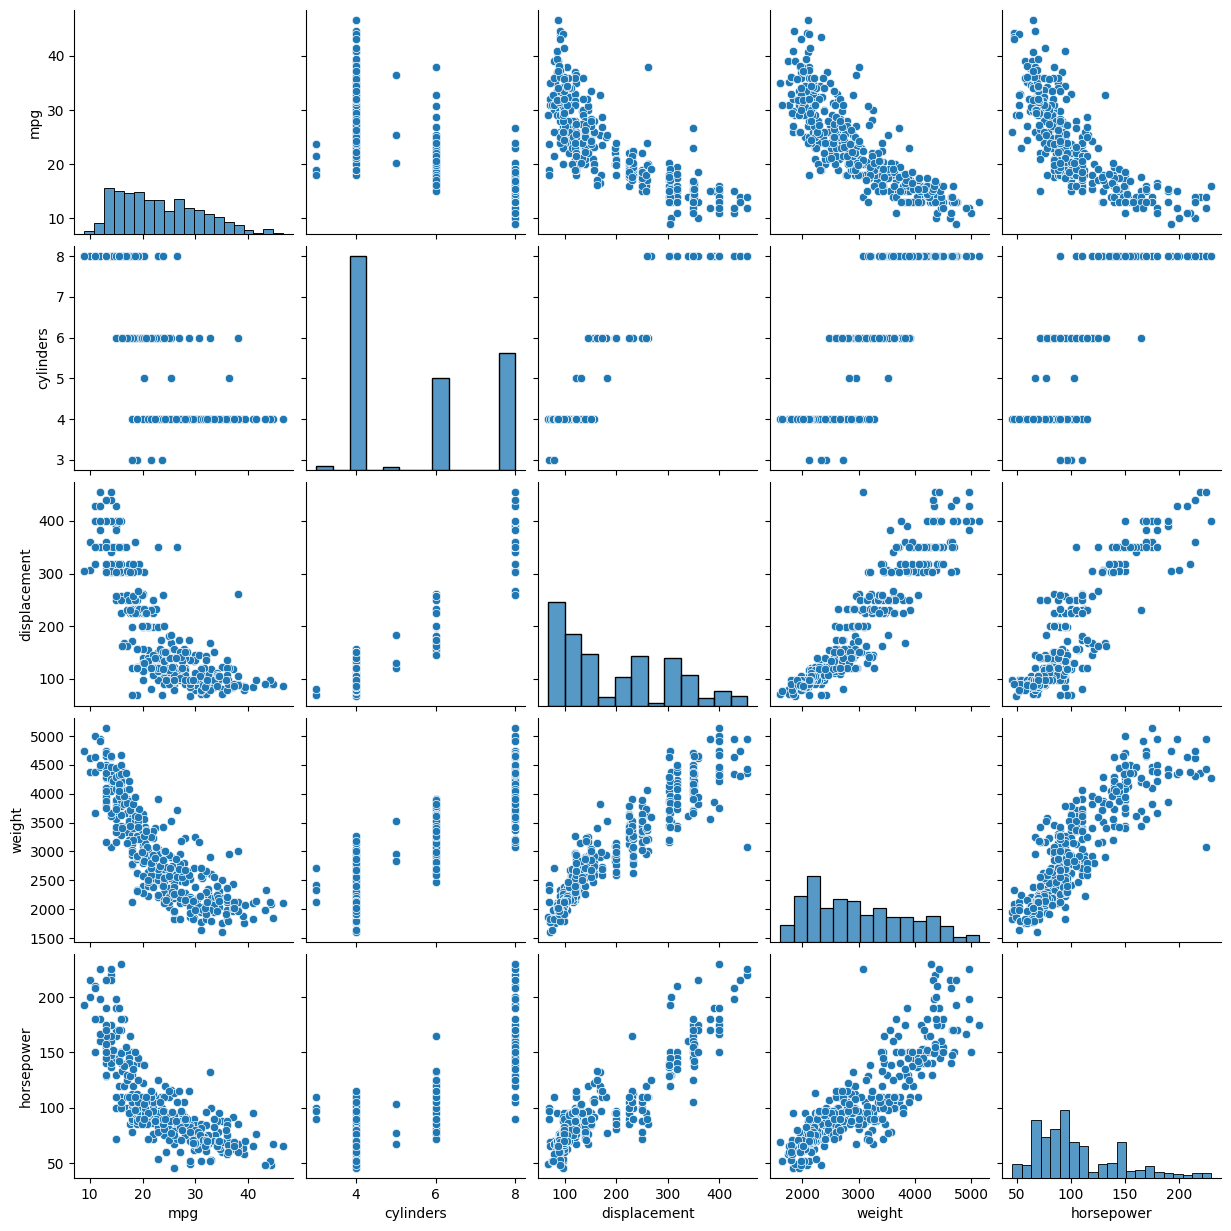

In [ ]:
##pairplots to get an intuition of potential correlations
sns.pairplot(data[["mpg", "cylinders", "displacement", "weight", "horsepower"]])

In [ ]:
#exracting the name of the brand

list_brand=[]
for i in range(1510):
    list_brand.append(data['name'][i].split(" ")[0])

In [ ]:
data['brand']=list_brand

In [ ]:
# some of the names as written in short so converitng it a common name for each name

data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'volkswagen')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes-benz','mercedes')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace(['chevroelt','chevy'],'chevrolet')

In [ ]:
data['brand'].value_counts()

ford          200
chevrolet     182
plymouth      119
amc           111
dodge         106
toyota         96
datsun         88
volkswagen     82
buick          65
pontiac        62
honda          45
mercury        43
mazda          41
oldsmobile     38
fiat           32
peugeot        31
audi           26
volvo          23
chrysler       22
renault        18
opel           16
saab           16
subaru         14
mercedes       11
cadillac        8
bmw             8
hi              4
triumph         3
Name: brand, dtype: int64

<ipython-input-14-1db17e32ff70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="brand",  data=data, palette="Greens_d",


<Axes: xlabel='count', ylabel='brand'>

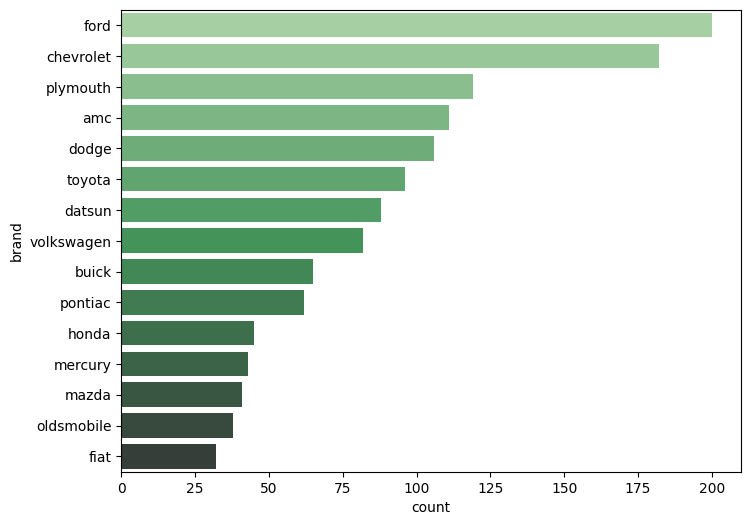

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y="brand",  data=data, palette="Greens_d",
              order=data.brand.value_counts().iloc[:15].index)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [ ]:
#converting cu inches to cu cm(cc)

data['displacement_in_cc']=data['displacement']*16.387

In [ ]:
#converting lbs to kg

data['weight_in_kg']=data['weight']/2.205

In [ ]:
#converting mpg to kpl

data['mileage_kpl']=data['mpg']/2.352

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand,displacement_in_cc,weight_in_kg,mileage_kpl
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,5030.809,1589.115646,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,5735.450,1674.829932,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,5211.066,1558.276644,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,4981.648,1556.916100,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,4948.874,1564.172336,7.227891


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mpg                 1510 non-null   float64
 1   cylinders           1510 non-null   int64  
 2   displacement        1510 non-null   float64
 3   horsepower          1510 non-null   float64
 4   weight              1510 non-null   int64  
 5   acceleration        1510 non-null   float64
 6   model_year          1510 non-null   int64  
 7   origin              1510 non-null   object 
 8   name                1510 non-null   object 
 9   brand               1510 non-null   object 
 10  displacement_in_cc  1510 non-null   float64
 11  weight_in_kg        1510 non-null   float64
 12  mileage_kpl         1510 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 153.5+ KB


In [ ]:
data['horsepower']=data['horsepower'].astype(int)

In [ ]:
data['origin'] = data['origin'].replace('usa',1)
data['origin'] = data['origin'].replace('europe',2)
data['origin'] = data['origin'].replace('japan',3)

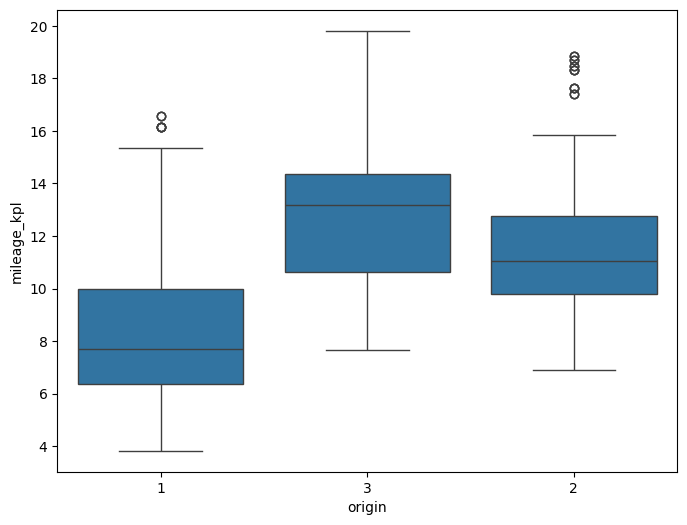

In [ ]:
#origin and performance
plt.figure(figsize=(8,6))
sns.boxplot(x=data['origin'],y=data['mileage_kpl']);

1- American origin

2- European origin

3- Asian origin

its clear that the origin of the car has a good impact on the mileage,with asian cars dominating the league.

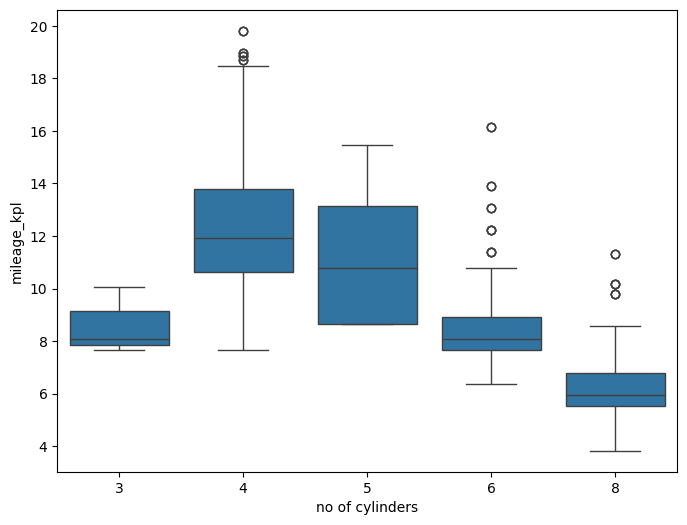

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['mileage_kpl'],x=data['cylinders'])
plt.xlabel("no of cylinders");

more the number of cylinder means more power which will burn more fuel and thus the mileage decreases.

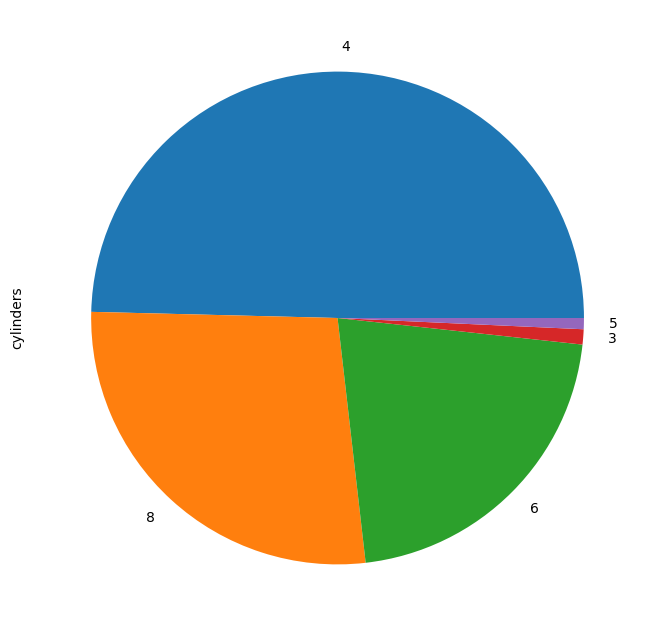

In [ ]:
#plotting pie chart for cylinders columns in the dataset

plt.figure(figsize=(14,8))
data.cylinders.value_counts().plot(kind='pie');

clearly we have more numbers of vehicles with 4 ,6 and 8 cylinders and very few examples with 3 and 5 cylinders.

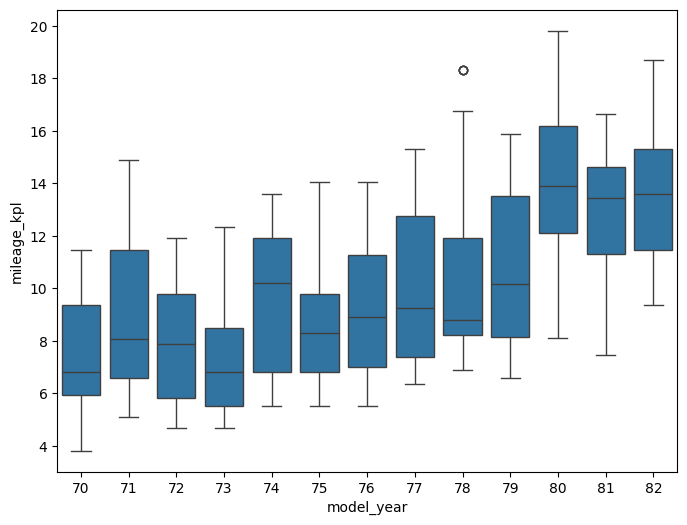

In [ ]:
#plotting boxplots to observe the performance over years

plt.figure(figsize=(8,6))
sns.boxplot(x=data['model_year'],y=data['mileage_kpl']);

with the technology being updated with time the performance of the vehicles has increased a lot.

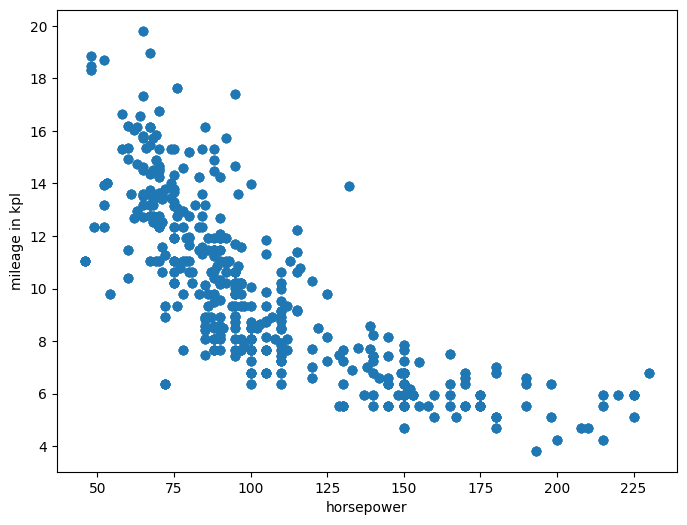

In [ ]:
#horsepower and mileage_kpl
plt.figure(figsize=(8,6))
plt.scatter(data.horsepower,data.mileage_kpl)
plt.xlabel('horsepower')
plt.ylabel('mileage in kpl');

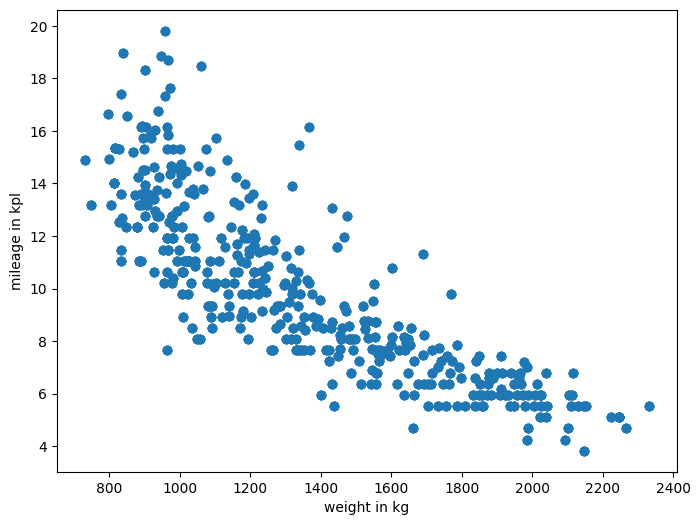

In [ ]:
#weight and mileage

plt.figure(figsize=(8,6))
plt.scatter(data.weight_in_kg,data.mileage_kpl)
plt.xlabel('weight in kg')
plt.ylabel('mileage in kpl');

In [ ]:
X=data.drop(['displacement','weight','name','brand','mpg'],axis=1)

In [ ]:
X.head()

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [ ]:
X.corr()

<ipython-input-31-6b9de402e4ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,cylinders,horsepower,acceleration,model_year,displacement_in_cc,weight_in_kg,mileage_kpl
cylinders,1.000000,0.841228,-0.513416,-0.322539,0.951059,0.897234,-0.779880
horsepower,0.841228,1.000000,-0.691855,-0.395203,0.896220,0.862499,-0.774778
acceleration,-0.513416,-0.691855,1.000000,0.283125,-0.552254,-0.425818,0.421519
model_year,-0.322539,-0.395203,0.283125,1.000000,-0.347444,-0.282527,0.555668
displacement_in_cc,0.951059,0.896220,-0.552254,-0.347444,1.000000,0.932899,-0.807858
weight_in_kg,0.897234,0.862499,-0.425818,-0.282527,0.932899,1.000000,-0.835979
mileage_kpl,-0.779880,-0.774778,0.421519,0.555668,-0.807858,-0.835979,1.000000


<ipython-input-32-9d22426a33a5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr());


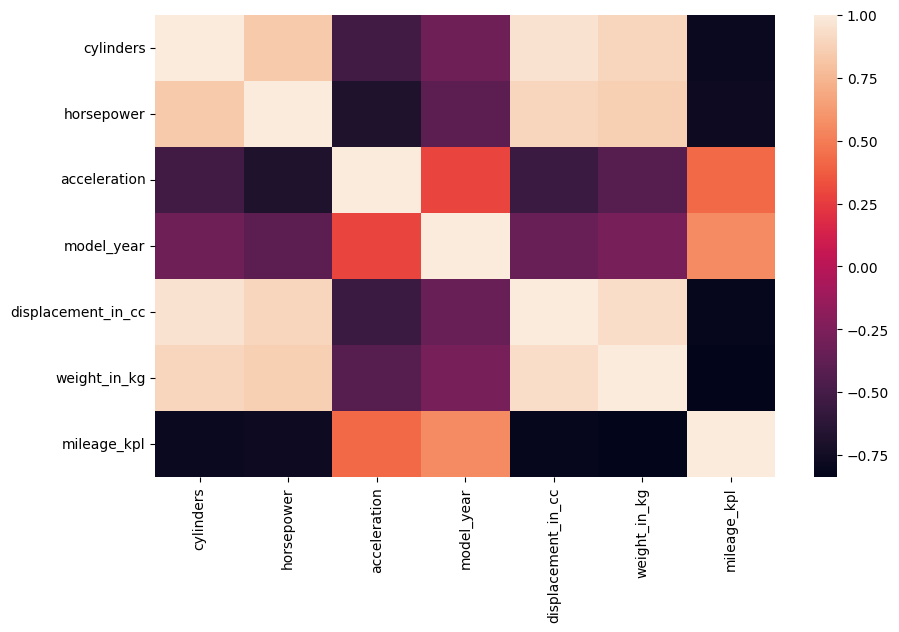

In [ ]:
#plot heatmap

plt.figure(figsize=(10,6))
sns.heatmap(X.corr());

In [ ]:
print(X.corr()["mileage_kpl"].sort_values(ascending=False))


mileage_kpl           1.000000
model_year            0.555668
acceleration          0.421519
horsepower           -0.774778
cylinders            -0.779880
displacement_in_cc   -0.807858
weight_in_kg         -0.835979
Name: mileage_kpl, dtype: float64


<ipython-input-33-2744c5486d87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X.corr()["mileage_kpl"].sort_values(ascending=False))


All these relations are proved by the visualisation we did.

In [ ]:
X.head()

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg,mileage_kpl
0,8,130,12.0,70,1,5030.809,1589.115646,7.653061
1,8,165,11.5,70,1,5735.450,1674.829932,6.377551
2,8,150,11.0,70,1,5211.066,1558.276644,7.653061
3,8,150,12.0,70,1,4981.648,1556.916100,6.802721
4,8,140,10.5,70,1,4948.874,1564.172336,7.227891


In [ ]:
y=X['mileage_kpl']

In [ ]:
X=X.drop(['mileage_kpl'],axis=1)

In [ ]:
X.head()

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg
0,8,130,12.0,70,1,5030.809,1589.115646
1,8,165,11.5,70,1,5735.450,1674.829932
2,8,150,11.0,70,1,5211.066,1558.276644
3,8,150,12.0,70,1,4981.648,1556.916100
4,8,140,10.5,70,1,4948.874,1564.172336


Getting test and train sets


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)

0.807833575064055

In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0471515768714819
Mean Squared Error: 1.9226125645926062
Root Mean Squared Error: 1.3865830536223231
R2 Score: 0.807833575064055


In [ ]:
# predicting the mileage of a vehicle with the trained model to check whether the results are satisfactory.

lr.predict([[4,120,9.7,90,3,1497,1160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.56323595])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
model_rf = RandomForestRegressor(n_estimators=50)

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 0.13822813893769448
Mean Squared Error: 0.08299340510407886
Root Mean Squared Error: 0.2880857599814313
R2 Score: 0.9917047530813933


In [ ]:
model_rf.predict([[4,120,9.7,90,3,1497,1160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.31462585])

In [ ]:
#Model Evaluation
vel_cof={'cylinders':4,
         'horsepower':120,
         'acceleration':9.7,
         'model_year':90,
         'origin':3,
         'displacement_in_cc':1497,
         'weight_in_kg':1160
}

# give the required values,for all the attributes

In [ ]:
df=pd.DataFrame(vel_cof,index=[0])
df

,cylinders,horsepower,acceleration,model_year,origin,displacement_in_cc,weight_in_kg
0,4,120,9.7,90,3,1497,1160


In [ ]:
model_rf.predict(df)

array([13.31462585])